In [1]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math

## Complexity - The "Big O" Bounds

![image info](big_O.jpg)

# Profiling the Algorithms


#### Create a list of items - I

In [2]:
timeit.default_timer()

166585.975404

In [3]:
L = [i for i in range(10)]

In [4]:
start = timeit.default_timer()
L=[]
for i in range(10):
    L.append(i)

stop = timeit.default_timer()
stop-start

0.00017939999816007912

In [5]:
def create_list_loop(length, max_value):
    L=[]
    for i in range(length):
        L.append(random.randint(0,max_value))
    return L

In [6]:
length=10
max_value=100
start = timeit.default_timer()
L = create_list_loop(length, max_value)
stop = timeit.default_timer()
print("Time in ms to create the list",stop-start)

Time in ms to create the list 0.00013490000856108963


#### Create a list of items - II

In [7]:
def create_list(length, max_value):
    return [random.randint(0,max_value) for i in range(length)]

In [8]:
#random.seed(42)
create_list(10, 25)

[17, 8, 21, 4, 10, 2, 23, 23, 10, 19]

In [9]:
length=10
max_value=100
start = timeit.default_timer()
L = create_list(length, max_value)
stop = timeit.default_timer()
print("Time in ms to create the list",stop-start)

Time in ms to create the list 7.660000119358301e-05


### Linear Search - I

In [10]:
def linear_search_1(item_list,to_find):
    N=False
    for i in item_list:
        if i==to_find:
            N=True
            break
        
    return N

In [11]:
start = timeit.default_timer()


found = linear_search_1([3,4,5,6,7,8],10)

stop = timeit.default_timer()

print("Was item found:",found)
print("Time in ms to find the item",stop-start)


Was item found: False
Time in ms to find the item 0.00011059999815188348


In [12]:
runs = 50

run_times = []

for _ in range(runs):

    my_list = [3,4,5,6,7,8]

    to_find=8

    start = timeit.default_timer()

    found = linear_search_1(my_list,to_find)

    stop = timeit.default_timer()
    
    run_times.append(stop-start)


In [13]:
def draw_show_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

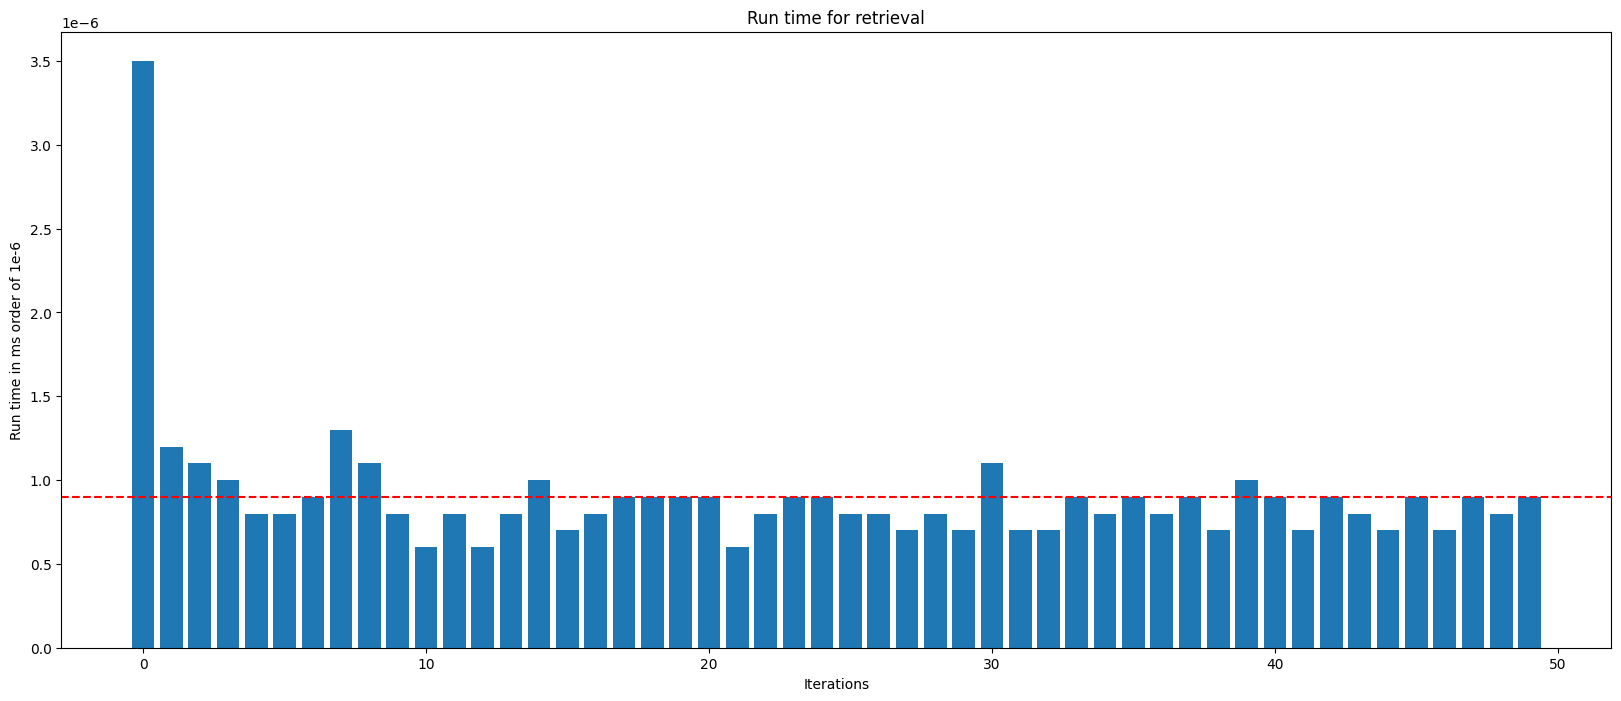

In [14]:
draw_show_plot(run_times)

#### Increase run times for static list - best case

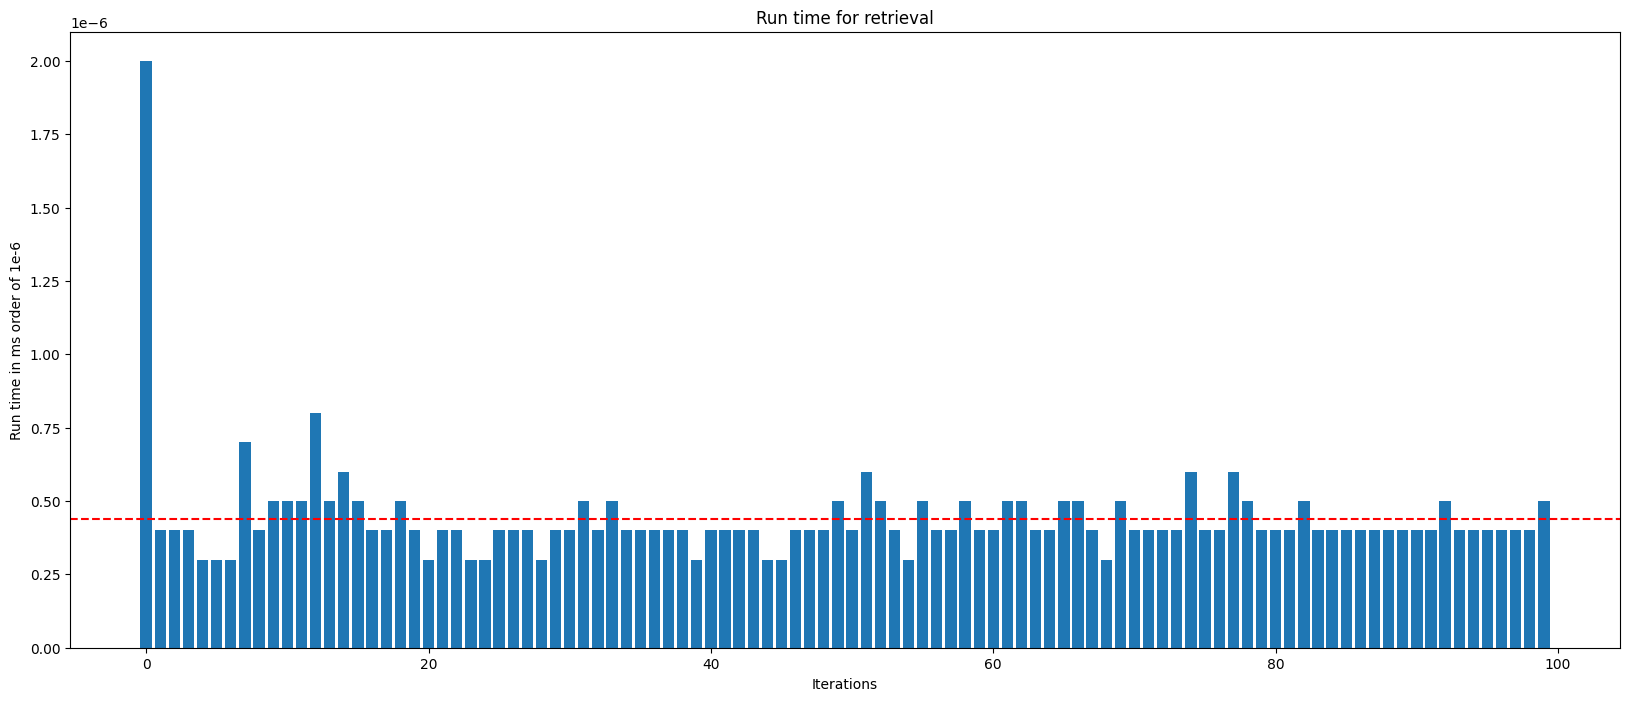

In [15]:
runs = 100
run_times = []
for _ in range(runs):
    my_list = [3,4,5,6,7,8]
    to_find=3
    start = timeit.default_timer()
    found = linear_search_1(my_list,to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_show_plot(run_times)

#### Increase run times for dynamic list - created everytime

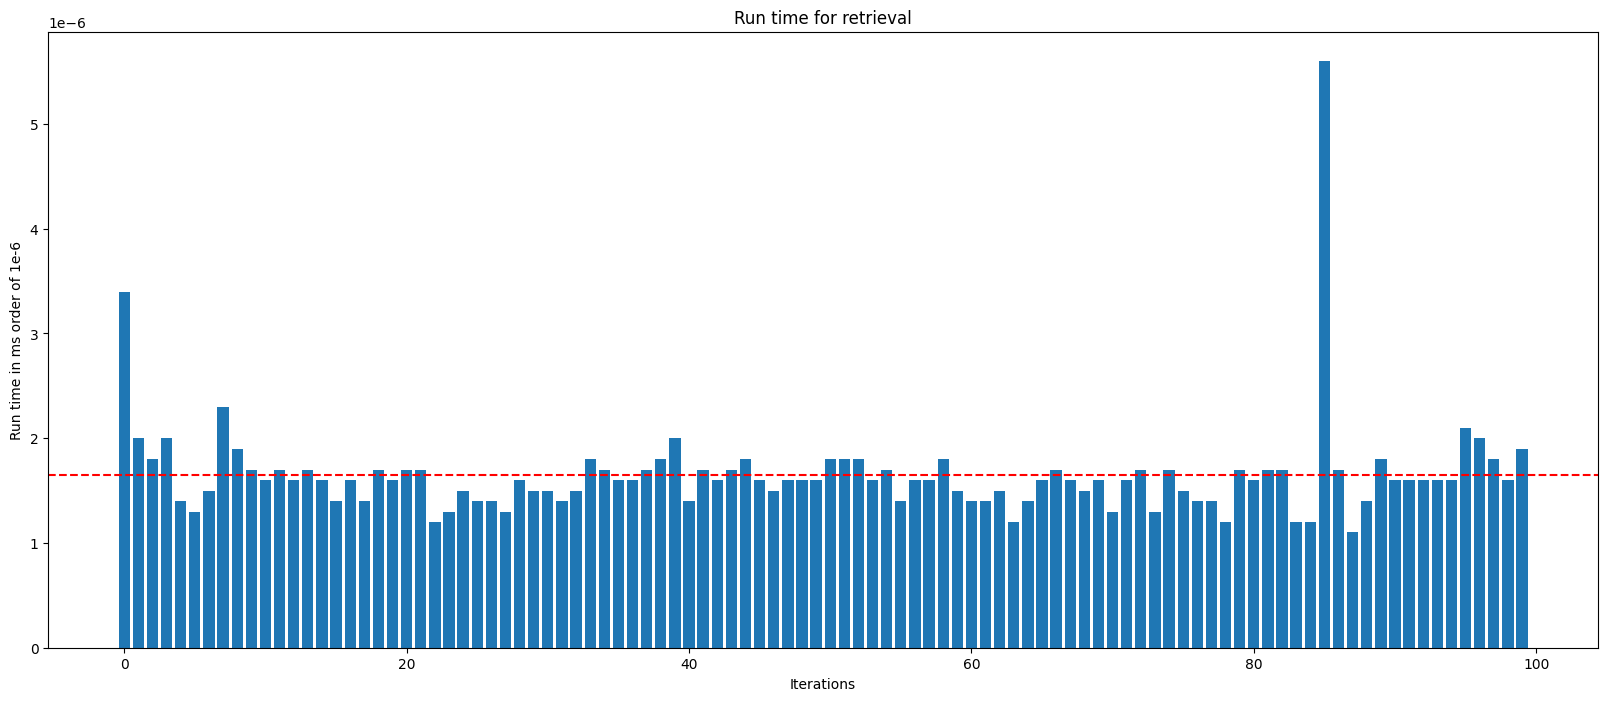

In [16]:
runs = 100

run_times = []

my_list = create_list(20,1000)

for _ in range(runs):

    to_find=500

    start = timeit.default_timer()

    found = linear_search_1(my_list,to_find)

    stop = timeit.default_timer()
    
    run_times.append(stop-start)

draw_show_plot(run_times)

#### Removing Function overheads

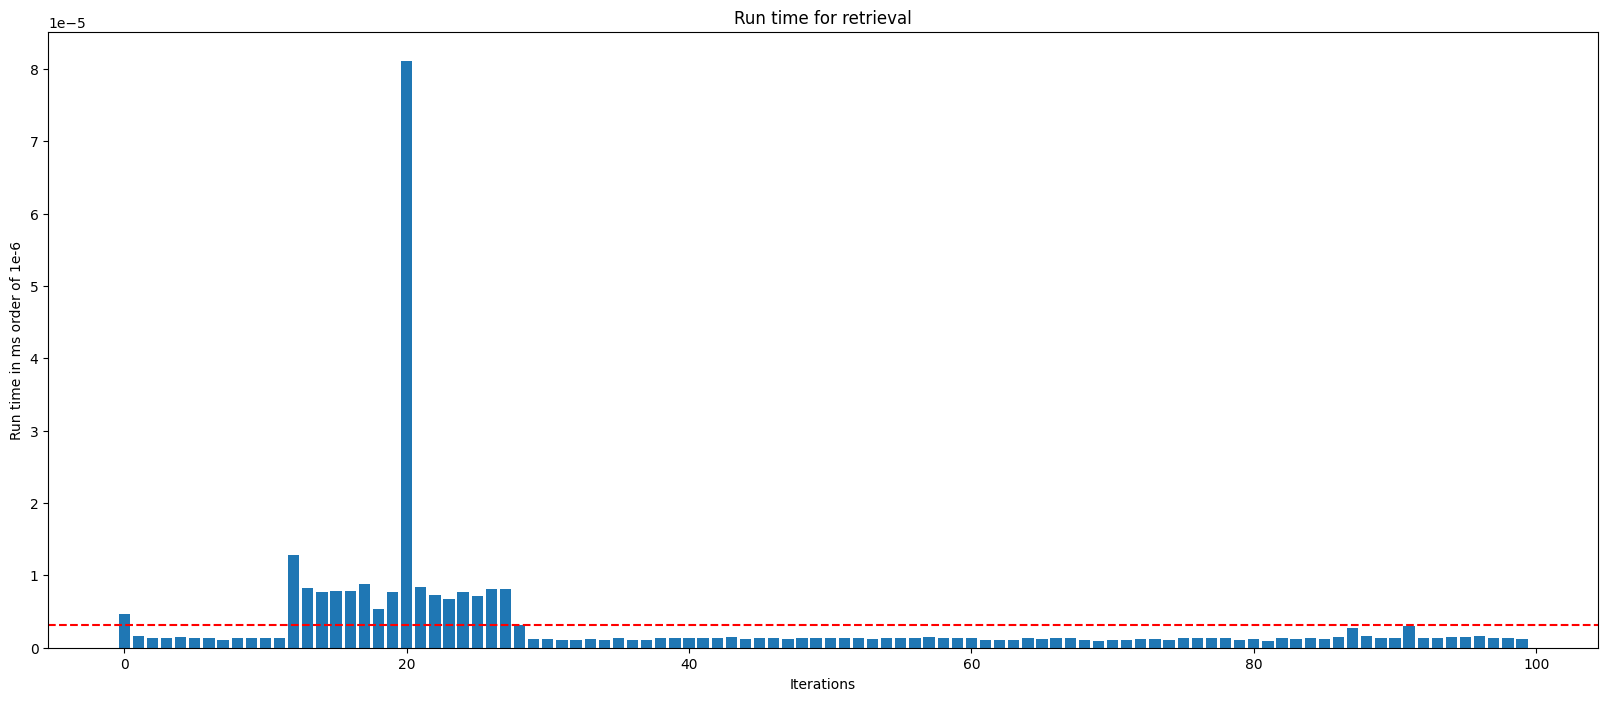

In [17]:
runs = 100

run_times = []

max_value = 500000

my_list = [random.randint(0,max_value) for i in range(length)]

for _ in range(runs):
    to_find=500

    start = timeit.default_timer()

    N=False
    for i in my_list:
        if i==to_find:
            N=True

    stop = timeit.default_timer()
    
    run_times.append(stop-start)

draw_show_plot(run_times)

### Linear Search  - II

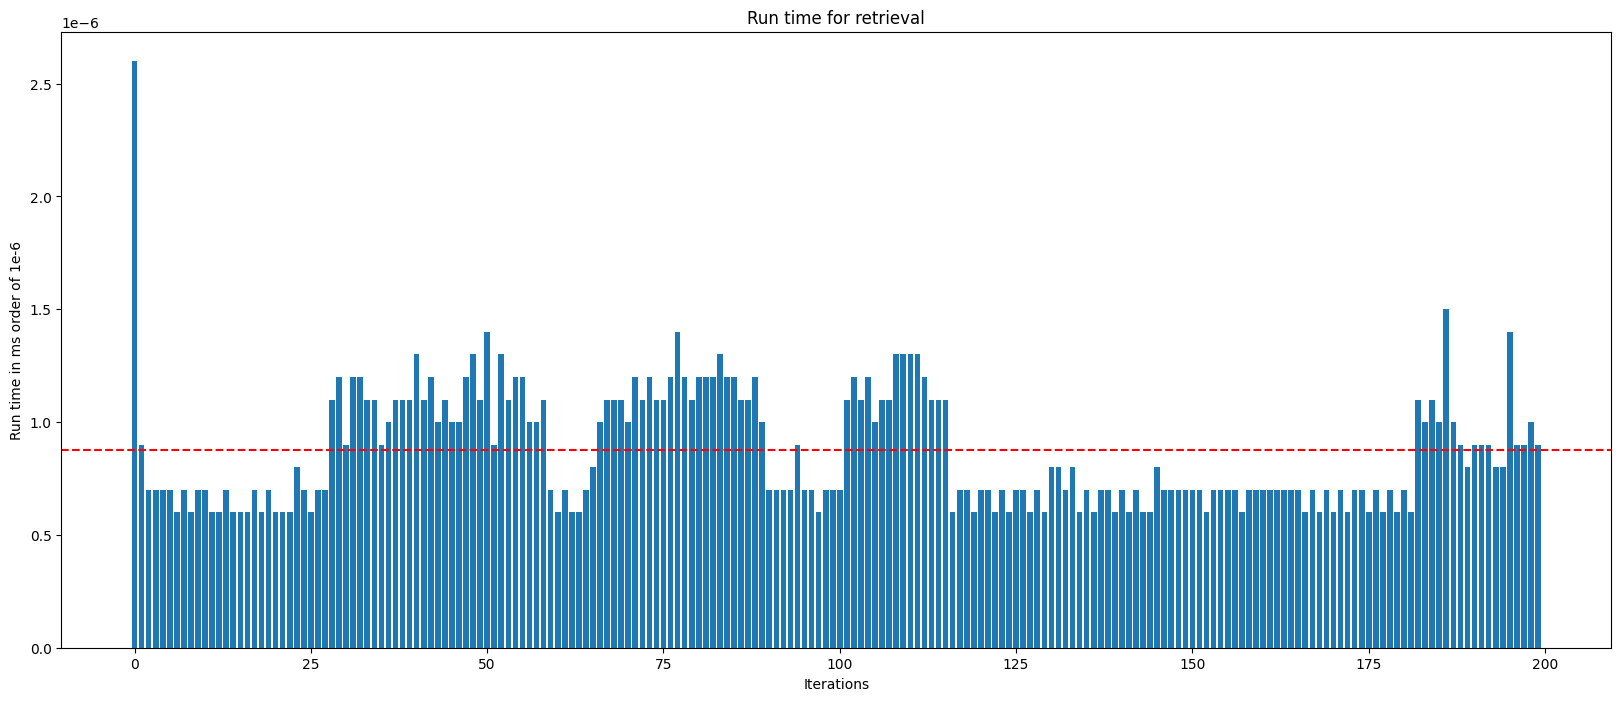

In [18]:
runs = 200
run_times = []
my_list = [random.randint(0,max_value) for i in range(length)]
to_find=500
for _ in range(runs):
    start = timeit.default_timer()
    # linear search -2 
    N=False
    for i in my_list:
        if i==to_find:
            N=True
            break
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_show_plot(run_times)

### Linear Search - III

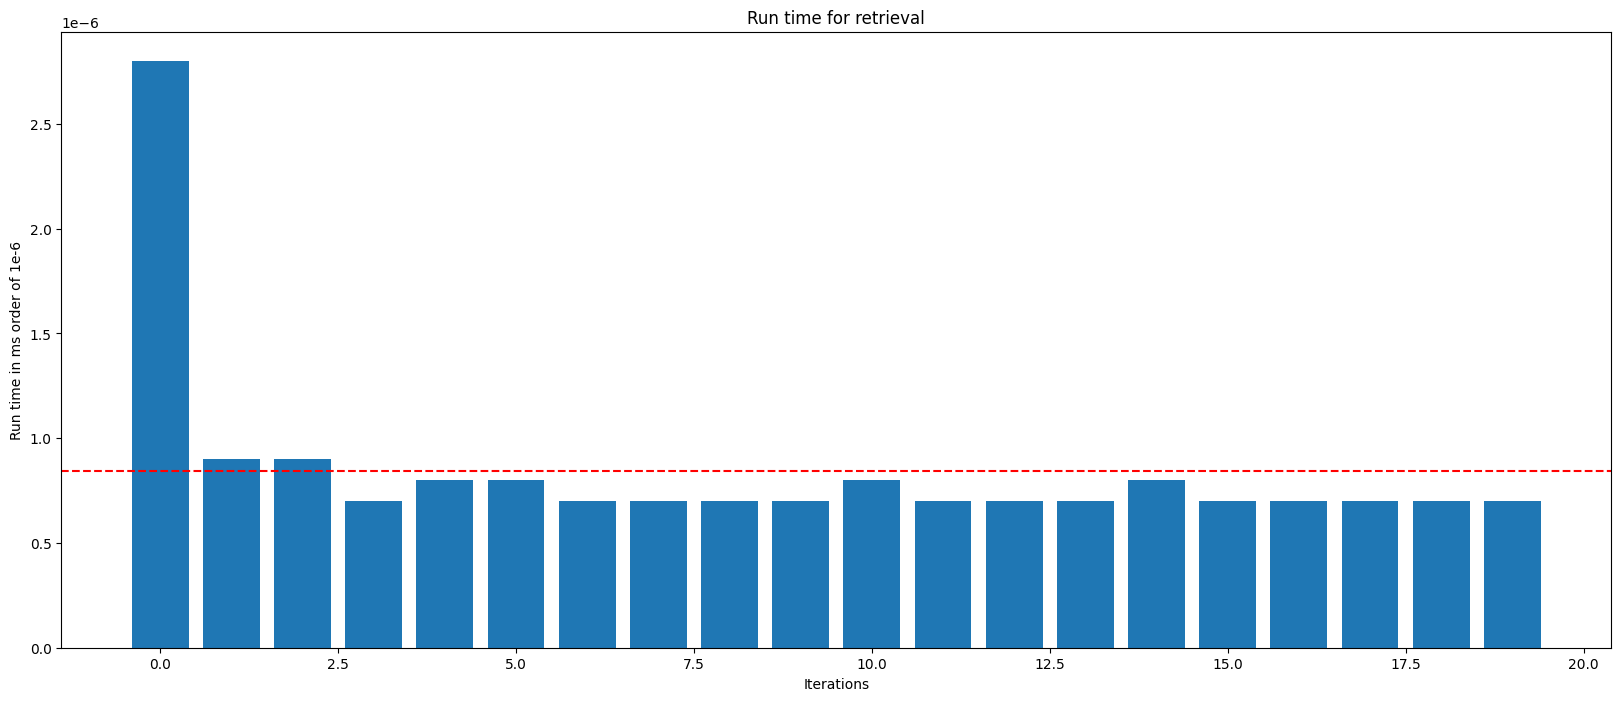

In [19]:
runs = 20
run_times = []
max_value=2000
my_list = [random.randint(0,max_value) for i in range(length)]
to_find=500
for _ in range(runs):
    
    start = timeit.default_timer()
    N=False

    for i in my_list:
        
        if i!=to_find:
            continue
        else:
            N=True
            break
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_show_plot(run_times)

#### Linear Search profiling - worst case

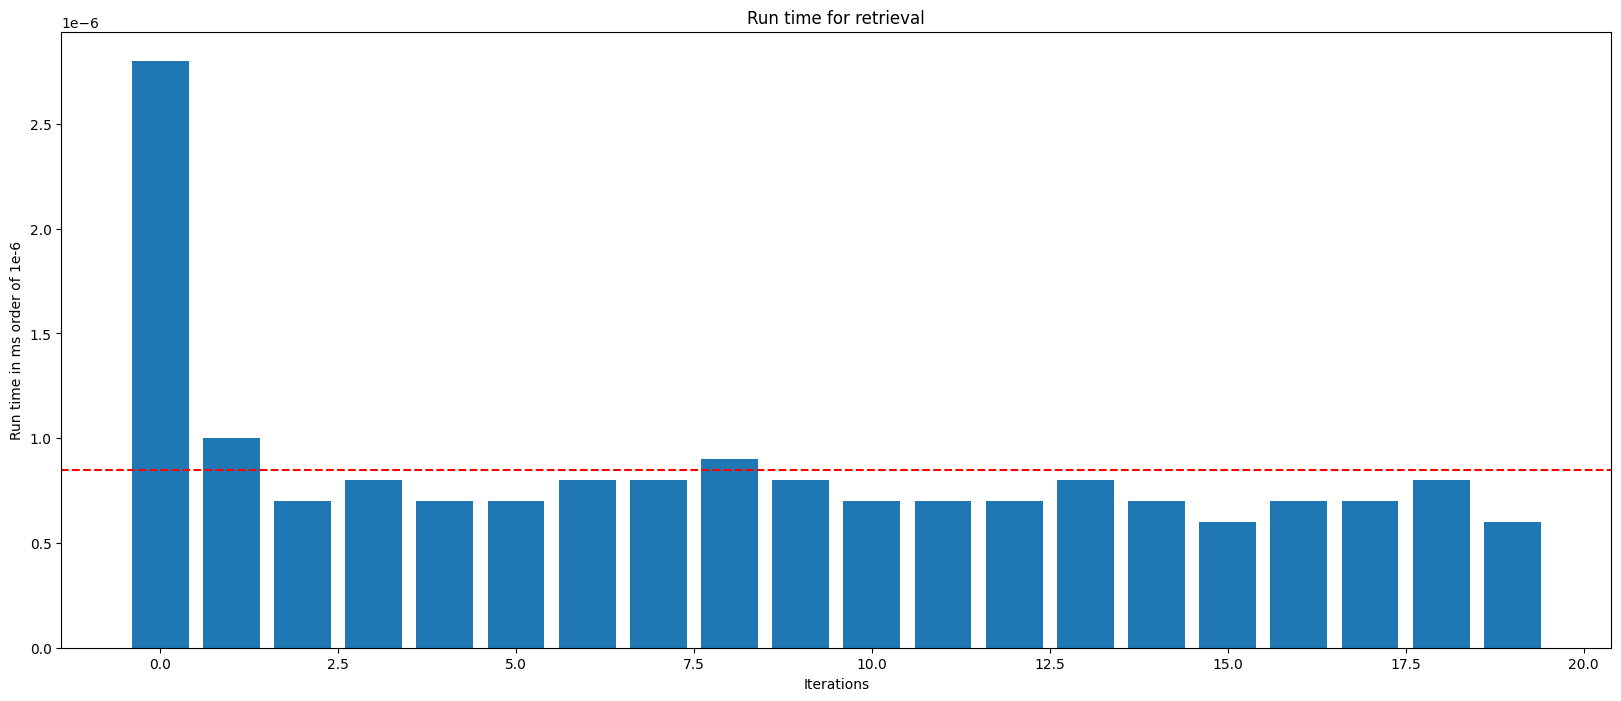

In [20]:
runs = 20
run_times = []
max_value=2000
my_list = [random.randint(0,2000) for i in range(length)]
for _ in range(runs):
    to_find=random.randint(0,2000)
    start = timeit.default_timer()
    N=False
    for i in my_list:
        if i==to_find:
            N=True
            break
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_show_plot(run_times)

### Test Cases

In [21]:
def create_list_custom(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

create_list_custom(10,1000,10,6)

[648, 235, 34, 499, 491, 122, 10, 563, 585, 520, 666]

## Binary Search


In [22]:
(1+4)//2

2

### Binary Search - I

In [23]:

def binary_search_1(item_list, to_find):
    lower=0

    upper=len(item_list)-1

    while lower < upper:
        mid = (lower+upper)//2

        if item_list[mid] == to_find:

            return True
        
        if item_list[mid] < to_find:

            lower = mid+1
        else:

            upper=mid
            
    return item_list[lower]==to_find

Found:  True


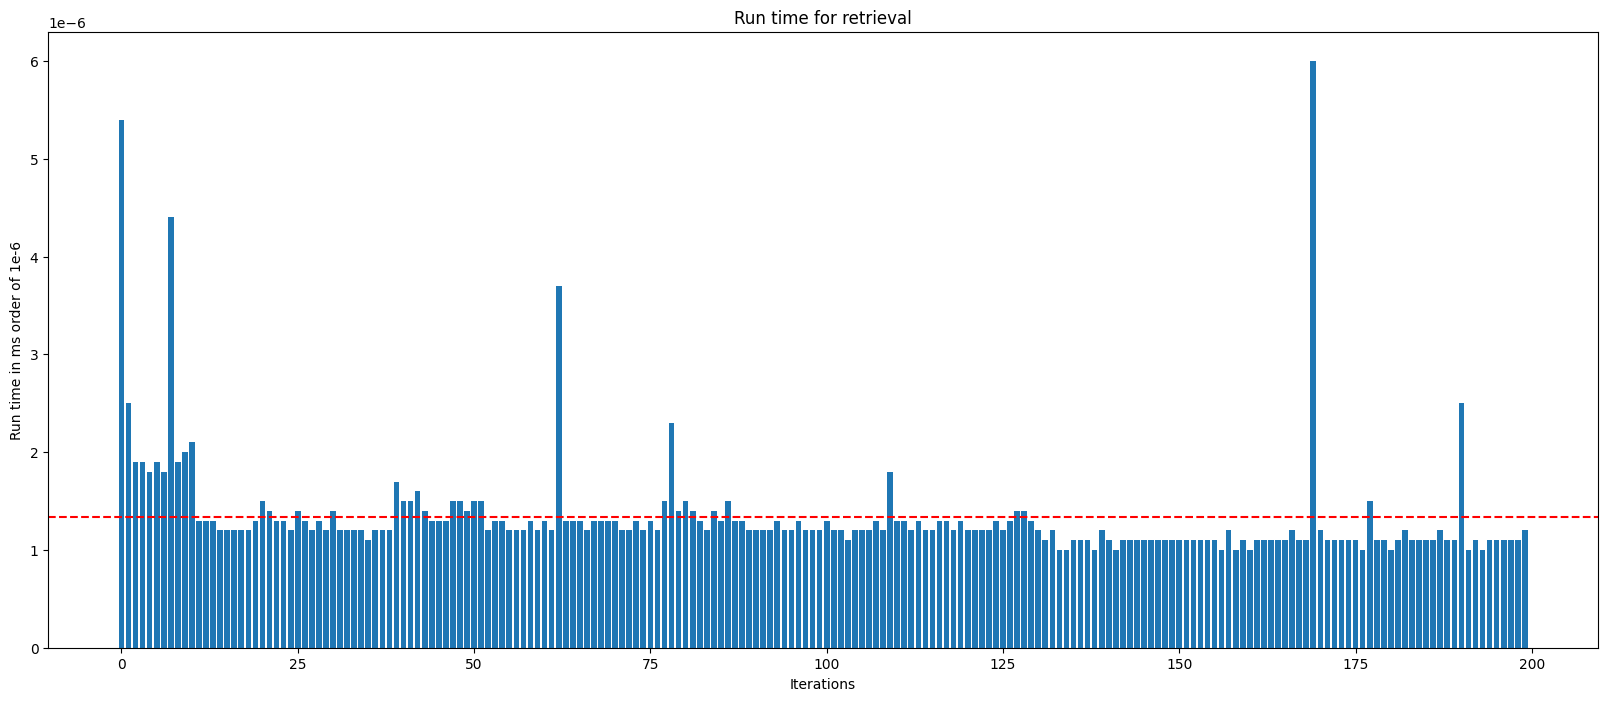

In [24]:
#insert 500 at 1000th position
# insert 500 at 999th postion
my_list = create_list_custom(2000,10000,500,999)
to_find = 500
runs=200
run_times=[]
for _ in range(runs):
    my_list.sort()
    start= timeit.default_timer()
    is_there = binary_search_1(my_list, to_find)
    stop=timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_show_plot(run_times)

#### Binary Search - I : Visualizing how the search space reduces

In [25]:
#insert 500 at 1000th position
# insert 500 at 999th postion
def binary_search_1_indices(item_list, to_find):
    lower=0
    upper=len(item_list)-1

    lb=[]
    mb=[]
    ub=[]

    while lower < upper:
        lb.append(lower)
        ub.append(upper)
        mid = (lower+upper)//2
        mb.append(mid)
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid
    is_there = item_list[lower]==to_find
    return (is_there,lb,ub,mb)
    

False 11


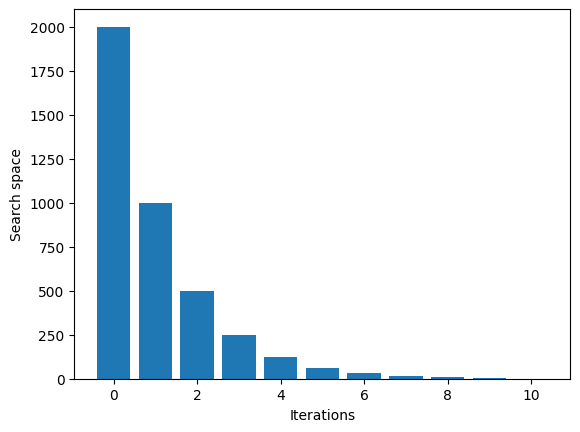

In [26]:
my_list = create_list_custom(2000,10000,500,999)
to_find = 500
is_there,lb,up,mb = binary_search_1_indices(my_list, to_find)

print(is_there,len(lb))


y = [up[i]-lb[i] for i in range(len(lb))]

plt.bar(np.arange(len(lb)),y)
plt.xlabel("Iterations")
plt.ylabel("Search space")
    
plt.show()


###  Linear Search - profiling

Found:  True


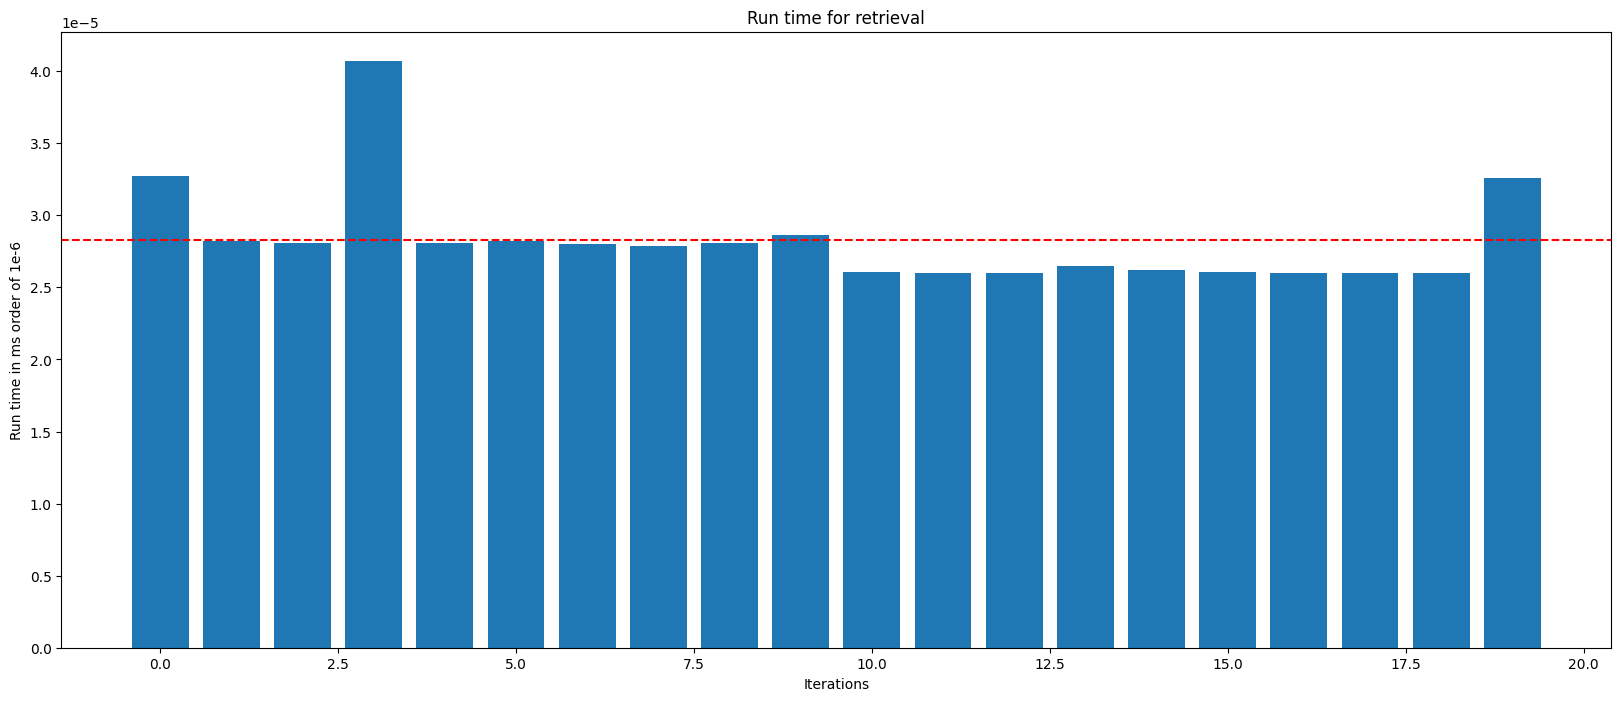

In [27]:
runs=20
run_times=[]
for _ in range(runs):
    start= timeit.default_timer()
    N=False
    for i in my_list:
        if i==to_find:
            N=True
            break
    stop=timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", N)
draw_show_plot(run_times)

### Binary Search - II

In [28]:
## round up
def binary_search_2(item_list, to_find):
    lower=0
    upper=len(item_list)-1

    # compute when the array is odd or even
    while lower <= upper:
        mid = (lower+upper)//2
        
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper=mid-1
    return item_list[lower]==to_find

### Binary Search II - profiling

Found:  True


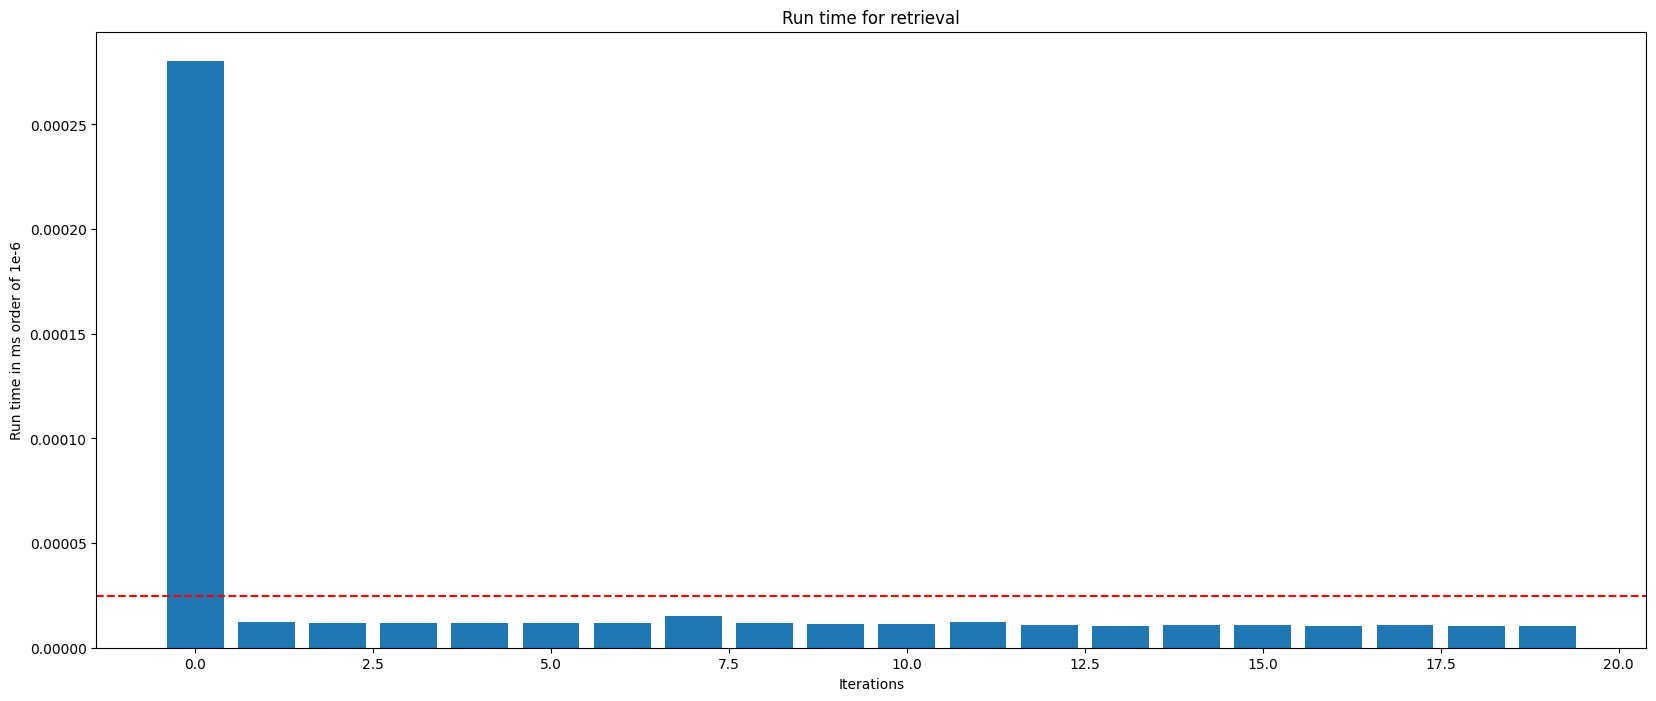

In [29]:
my_list = create_list_custom(2000,10000,500,999)
to_find = 500
runs=20
run_times=[]
for _ in range(runs):
    start= timeit.default_timer()
    my_list.sort()
    is_there = binary_search_2(my_list, to_find)
    stop=timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_show_plot(run_times)

### Binary Search - III

In [30]:

def binary_search_3(item_list, to_find):
    left=0
    right=len(item_list)-1
    while left != right:

        mid = (left+right)//2

        if item_list[mid] < to_find:
            lower = mid+1
        elif item_list[mid] > to_find:
            upper = mid
        else:
            return True
    return item_list[lower]==to_find

In [33]:
my_list = create_list_custom(2002,10000,500,1000)
to_find = 500
runs=20
run_times=[]
for _ in range(runs):
    start= timeit.default_timer()
    is_there = binary_search_3(my_list, to_find)
    stop=timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_show_plot(run_times)

![image info](lecture_problem_001.png)